# 1. Fashion MNIST Dataset

- Recognize different items of clothing
- Fashion recognition using a **Deep Neural Network (DNN)**

4423680/4422102 [==============================] - 0s 0us/step
9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0  

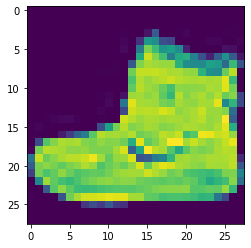

In [1]:
import tensorflow as tf

# The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:
mnist =tf.keras.datasets.fashion_mnist

# load_data on this object will give you two sets of two lists, the training and testing values
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Let's print a training image
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [2]:
# We should normalize the data before training it 
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Let's Define the model 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

"""
*Sequential*: That defines a SEQUENCE of layers in the neural network

*Flatten*: Flatten just takes the input matris and turns it into a 1 dimensional set.

*Dense*: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. 

*Relu* : If X>0 return X, else return 0" it only passes values 0 or greater to the next layer 

*Softmax* takes a set of values, and picks the biggest one, [0.1, 0.1, 0.05, 9.5] --> [0,0,0,1] 

"""

# Let's built the model by compiling it
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training dataset
print('Training :')
model.fit(training_images, training_labels, epochs=5)

# Evaluate the model with the test dataset
print('\nEvaluation :')
model.evaluate(test_images, test_labels)

Training :
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6163 - accuracy: 0.7874
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3827 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3420 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2880 - accuracy: 0.8941

Evaluation :
313/313 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8763


[0.35612696409225464, 0.8762999773025513]

# 2. MNIST Handwriting Digits

In [18]:
def train_mnist():
    # to stop training once you reach the wanted level of accuracy, Here: 99%           
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True            
               
    callbacks = myCallback()        

    mnist = tf.keras.datasets.mnist
    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train = x_train/255.0
    x_test = y_train/255.0

    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    return len(history.epoch), history.history['accuracy'][-1]
    
train_mnist()    

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3106 - accuracy: 0.9083
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0732 - accuracy: 0.9778
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0457 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0301 - accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0221 - accuracy: 0.9929

Reached 99% accuracy so cancelling training!


(5, 0.9912166595458984)

# 3. Using Convolutions

- The ultimate concept is that Convolutions narrow down the content of the image to focus on specific, distinct, details.

- In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. To see examples, take a look at here "https://en.wikipedia.org/wiki/Kernel_(image_processing)"

- That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

In [21]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# First convolution expects a single tensor containing everything
# So instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0 
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  # Parameters of Conv : 1. The number of convolutions    
  #                      2. The size of the Convolution, in this case a 3x3 grid    
  # Pooling : compress the image, while maintaining the content of the features that were highlighted by the convlution                             
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# to see the size and shape of the network
model.summary()

model.fit(training_images, training_labels, epochs=3)

model.evaluate(test_images, test_labels)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

[0.2785337269306183, 0.8999000191688538]

# 4. Convolutions, ImageGenerator

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-12-23 14:59:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c00::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  91.1MB/s    in 1.6s    

2020-12-23 14:59:21 (91.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [4]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.


Here we do not explicitly label the images. ImageGenerator read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately.

In [8]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_horse_names = os.listdir(train_horse_dir)
print('total training horse images:', len(os.listdir(train_horse_dir)))


# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
train_human_names = os.listdir(train_human_dir)
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

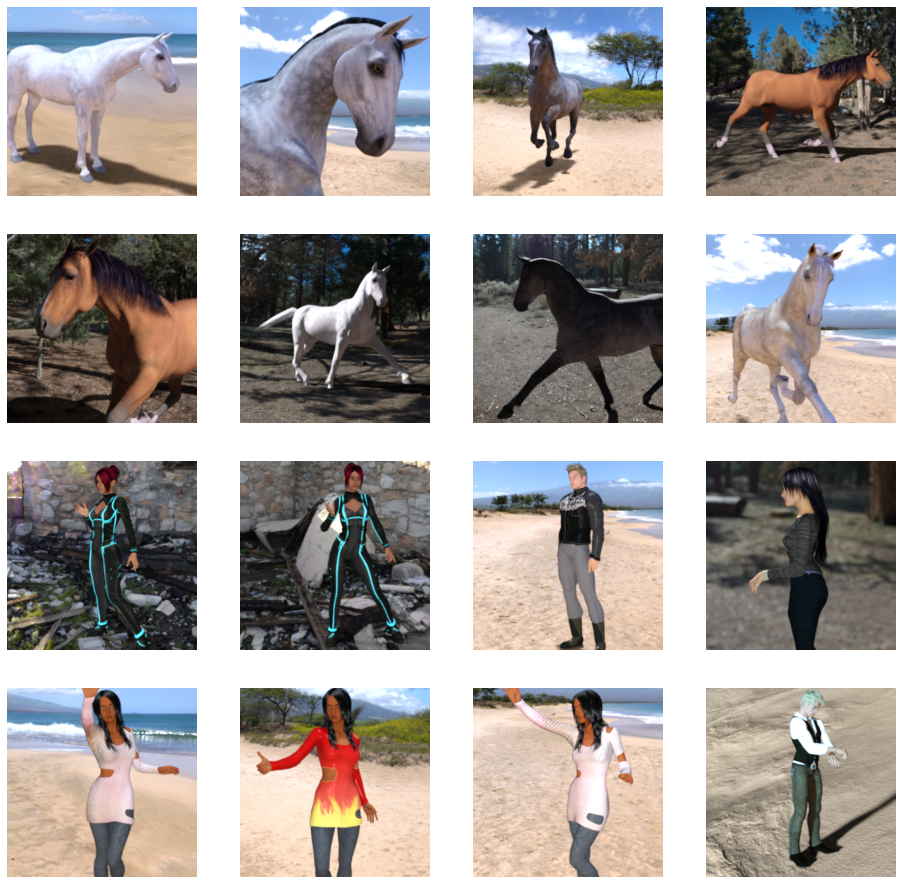

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)       

In [15]:
# Will use the rmsprop optimizer that automates learning-rate tuning for us
from tensorflow.keras.optimizers import RMSprop

# we will use "binary_crossentropy" loss, because it's a binary classification problem
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(lr=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) 

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

Found 1027 images belonging to 2 classes.


### Training


In [17]:
model.fit(
      train_generator,
      steps_per_epoch=8,  # data_size/batch_size
      epochs=15,
      verbose=1)   # it will show for each epoch an animated progress bar

Epoch 1/15
8/8 [==============================] - 73s 9s/step - loss: 0.6980 - accuracy: 0.5807
Epoch 2/15
8/8 [==============================] - 68s 8s/step - loss: 0.8788 - accuracy: 0.6720
Epoch 3/15
8/8 [==============================] - 68s 8s/step - loss: 0.4258 - accuracy: 0.8547
Epoch 4/15
8/8 [==============================] - 68s 8s/step - loss: 0.2361 - accuracy: 0.8991
Epoch 5/15
8/8 [==============================] - 76s 9s/step - loss: 0.3563 - accuracy: 0.8652
Epoch 6/15
8/8 [==============================] - 68s 8s/step - loss: 0.2285 - accuracy: 0.9352
Epoch 7/15
8/8 [==============================] - 67s 8s/step - loss: 0.2148 - accuracy: 0.9446
Epoch 8/15
8/8 [==============================] - 76s 9s/step - loss: 0.1166 - accuracy: 0.9533
Epoch 9/15
8/8 [==============================] - 70s 9s/step - loss: 0.0764 - accuracy: 0.9687
Epoch 10/15
8/8 [==============================] - 68s 8s/step - loss: 0.0394 - accuracy: 0.9880
Epoch 11/15
8/8 [======================

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

# 5. Happy or Sad Prediction 

This a link to a happy or sad dataset which contains 40 happy and 40 sad images. 

Let's create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999



In [28]:
DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2020-12-23 17:29:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.28.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-12-23 17:29:20 (117 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [29]:
# Define and Compile the Model
model = tf.keras.models.Sequential([
           tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
           tf.keras.layers.MaxPooling2D(2, 2),

           tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           
           tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
           tf.keras.layers.MaxPooling2D(2,2),
           
           tf.keras.layers.Flatten(),
           tf.keras.layers.Dense(512, activation='relu'),
           tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(lr=0.001),
        metrics=['accuracy']
        )

In [30]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        "/tmp/h-or-s",
        target_size=(150,150),
        batch_size=8,
        class_mode='binary'
    )

Found 80 images belonging to 2 classes.


In [31]:
# This code block should call model.fit and train for
# a number of epochs. 
model.fit_generator(
        train_generator,
        steps_per_epoch=10,  
        epochs=15,
        verbose=1,
        callbacks=[callbacks]
    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
10/10 [==============================] - 3s 224ms/step - loss: 2.7381 - accuracy: 0.4294
Epoch 2/15
10/10 [==============================] - 2s 227ms/step - loss: 0.6229 - accuracy: 0.5581
Epoch 3/15
10/10 [==============================] - 2s 221ms/step - loss: 0.2341 - accuracy: 0.9022
Epoch 4/15
10/10 [==============================] - 2s 225ms/step - loss: 0.2274 - accuracy: 0.9685
Epoch 5/15
10/10 [==============================] - 2s 225ms/step - loss: 0.1150 - accuracy: 0.9396
Epoch 6/15
10/10 [==============================] - 2s 225ms/step - loss: 0.1694 - accuracy: 0.9305
Epoch 7/15
10/10 [==============================] - 2s 221ms/step - loss: 0.0616 - accuracy: 0.9596
Epoch 8/15
10/10 [==============================] - 2s 227ms/step - loss: 0.0151 - accuracy: 1.0000

Reached 99.9% accuracy so cancelling training!
